In [21]:
#some imports and loading the data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import squarify
import time
import nltk
from nltk.corpus import stopwords
from collections import Counter
data = pd.read_csv("ireland-news-headlines.csv")
data

,publish_date,headline_category,headline_text
0,19960102,news,UUP sees possibility of voting Major out
1,19960102,news,Pubs targeted as curbs on smoking are extended
2,19960102,news,Papers reveal secret links with O'Neill cabinet
3,19960102,news,Domestic chaos as Italy takes EU presidency
4,19960102,news,Learning about the star to which we owe life
...,...,...,...
1611490,20210630,news.politics.oireachtas,Reserve members of Defence Forces to be allowe...
1611491,20210630,culture,Maureen Dowd: Joe Biden is 'crazy about the Ir...
1611492,20210630,sport.others,Andy Murray rolls back the years to own Centre...
1611493,20210630,news.health,Delta variant could do 'significant damage' in...


# Data Initial Preprocessing

### lower letters in category and title

In [3]:
#useable paramerters:
total_rec = data.shape[0]
total_rec

1611495

### changing all letters to be lower 

In [4]:
lower_letters = data.copy()
lower_letters["headline_text"] = lower_letters["headline_text"].str.lower()
lower_letters["headline_category"] = lower_letters["headline_category"].str.lower()
#data1: all lower letters
data1 = lower_letters.copy()

### Remove duplicates

In [5]:
#deleteing duplications - data2: no duplicates
duplicates = data1.duplicated(subset=['headline_text', 'headline_category'])
count_dups = duplicates.sum()
data_no_dups = data1[~duplicates]
data2 = data_no_dups.copy()

print("There were", count_dups, "duplicates that were deleted which are",round(count_dups/total_rec,3) ,"of data\nLeft", total_rec-count_dups, "records")

There were 91134 duplicates that were deleted which are 0.057 of data
Left 1520361 records


In [6]:
counts = lower_letters["headline_category"].astype(str) + '-' + lower_letters["headline_text"].astype(str)
counts = counts.value_counts()
unique_dups = counts[counts>1].shape[0]
print("unique records showing more than once: ",unique_dups)

unique records showing more than once:  19618


In [7]:
#changing data format. data3: changed data column's format
data2["publish_date"] = pd.to_datetime(data2["publish_date"], format="%Y%m%d")
data3 = data2.copy()

### Remove Nulls

In [8]:
null_counts = data3.isnull().sum()
null_counts

publish_date         0
headline_category    0
headline_text        4
dtype: int64

In [9]:
#removing nulls: data4: removed nulls
data4 = data3.dropna(subset=["headline_text"])
data4

,publish_date,headline_category,headline_text
0,1996-01-02,news,uup sees possibility of voting major out
1,1996-01-02,news,pubs targeted as curbs on smoking are extended
2,1996-01-02,news,papers reveal secret links with o'neill cabinet
3,1996-01-02,news,domestic chaos as italy takes eu presidency
4,1996-01-02,news,learning about the star to which we owe life
...,...,...,...
1611490,2021-06-30,news.politics.oireachtas,reserve members of defence forces to be allowe...
1611491,2021-06-30,culture,maureen dowd: joe biden is 'crazy about the ir...
1611492,2021-06-30,sport.others,andy murray rolls back the years to own centre...
1611493,2021-06-30,news.health,delta variant could do 'significant damage' in...


# Preprocessing Cont. - Data Exploration & Visualization

## Categories 

#### Category Distribution

In [10]:
category_counts = data4["headline_category"].value_counts()
total_categories = category_counts.count()
print("total categories: ", total_categories)
#the proportion of each category
categ_freq = category_counts/total_rec
categ_freq

total categories:  103


news                               0.351337
sport                              0.094280
business                           0.065905
opinion.letters                    0.033710
opinion                            0.025713
                                     ...   
lifestyle.food.restaurant          0.000126
news.technology                    0.000117
business.markets.bonds             0.000078
lifestyle.abroad.working-abroad    0.000072
news.health.coronavirus            0.000065
Name: headline_category, Length: 103, dtype: float64

### Adding primary category of the headline which is the first word in the category

In [11]:
#data5 has a new column with the primary category of the headline which is the first word in the category
data5 = data4.copy()
data5["primary_category"] = data4['headline_category'].str.split('.', expand=True)[0]
data5

,publish_date,headline_category,headline_text,primary_category
0,1996-01-02,news,uup sees possibility of voting major out,news
1,1996-01-02,news,pubs targeted as curbs on smoking are extended,news
2,1996-01-02,news,papers reveal secret links with o'neill cabinet,news
3,1996-01-02,news,domestic chaos as italy takes eu presidency,news
4,1996-01-02,news,learning about the star to which we owe life,news
...,...,...,...,...
1611490,2021-06-30,news.politics.oireachtas,reserve members of defence forces to be allowe...,news
1611491,2021-06-30,culture,maureen dowd: joe biden is 'crazy about the ir...,culture
1611492,2021-06-30,sport.others,andy murray rolls back the years to own centre...,sport
1611493,2021-06-30,news.health,delta variant could do 'significant damage' in...,news


## Visualize Categories

### Some visualizations to understand how primary categories are distributed

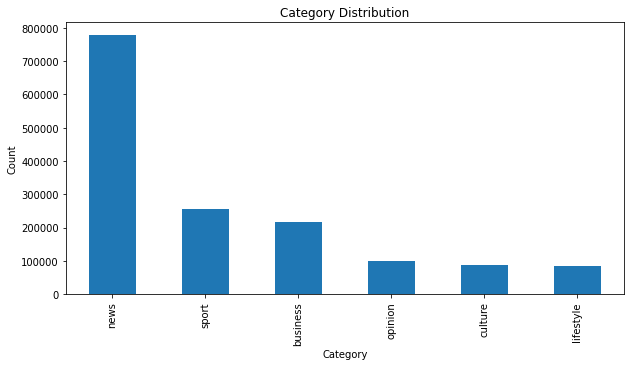

In [13]:
import matplotlib.pyplot as plt

#the categories that make 100% of all records
category_counts = data5['primary_category'].value_counts()
cumulative_pct = category_counts.cumsum() / category_counts.sum()
top_categories = cumulative_pct[cumulative_pct <= 1].index

filtered_category_counts = category_counts.loc[top_categories]


plt.figure(figsize=(10, 5))
filtered_category_counts.plot(kind="bar")
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
#plt.savefig("plots\Category Distribution.png")
plt.show()

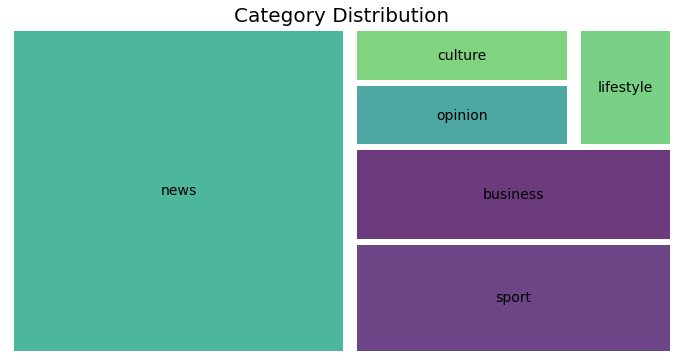

In [14]:
#visualization for 80% of all categories

import squarify
import time
cumulative_pct = category_counts.cumsum() / category_counts.sum()
top_categories = cumulative_pct.index

filtered_category_counts = category_counts.loc[top_categories]
plt.figure(figsize=(12, 6), facecolor= 'white')
label_font = {'fontsize': 14}
squarify.plot(sizes=filtered_category_counts, label=filtered_category_counts.index, alpha=.8, pad=True, text_kwargs= label_font)
plt.axis("off")
plt.title("Category Distribution", fontsize = 20)
#plt.savefig("/content/drive/MyDrive/DeepLearning - Headlines Proj/Plots/Category Distribution Boxes.png")
plt.show()

In [15]:
category_counts

news         778288
sport        254447
business     216264
opinion       99609
culture       86292
lifestyle     85457
Name: primary_category, dtype: int64

In [16]:
data6 = data5.copy()

### adding columns for the data instaed of the original column

In [17]:
import pandas as pd

data6['day'] = data6['publish_date'].dt.day
data6['date'] = data6['publish_date'].dt.month
data6['year'] = data6['publish_date'].dt.year

# Drop the original timestamp column if no longer needed
data6 = data6.drop('publish_date', axis=1)


In [18]:
data6

,headline_category,headline_text,primary_category,day,date,year
0,news,uup sees possibility of voting major out,news,2,1,1996
1,news,pubs targeted as curbs on smoking are extended,news,2,1,1996
2,news,papers reveal secret links with o'neill cabinet,news,2,1,1996
3,news,domestic chaos as italy takes eu presidency,news,2,1,1996
4,news,learning about the star to which we owe life,news,2,1,1996
...,...,...,...,...,...,...
1611490,news.politics.oireachtas,reserve members of defence forces to be allowe...,news,30,6,2021
1611491,culture,maureen dowd: joe biden is 'crazy about the ir...,culture,30,6,2021
1611492,sport.others,andy murray rolls back the years to own centre...,sport,30,6,2021
1611493,news.health,delta variant could do 'significant damage' in...,news,30,6,2021


## Balancing the data

### Handling majority classes by undersampling

In [19]:
from sklearn.utils import resample

# Define majority classes
majority_classes = ['news', 'sport', 'business']

# Define the target number of samples
n_samples = data6[data6['primary_category'] == 'business'].shape[0]

# Perform undersampling for the majority classes
for cat in majority_classes:
    data_majority = data6[data6['primary_category'] == cat]
    data_majority_downsampled = resample(data_majority, 
                                         replace=False,     # sample without replacement
                                         n_samples=n_samples,  # to match minority class
                                         random_state=123)   # reproducible results
    # Replace the original majority class with the downsampled data
    data6 = data6[data6['primary_category'] != cat]
    data6 = pd.concat([data6, data_majority_downsampled])


### Handling minority classes by oversampling 

In [22]:
from sklearn.utils import resample

# Define minority classes
minority_classes = ['opinion', 'culture', 'lifestyle']

# Define the target number of samples. Here, we'll take the median of all class sizes as target.
sizes = [data6[data6['primary_category'] == cat].shape[0] for cat in data6['primary_category'].unique()]
n_samples = int(np.median(sizes))

# Perform oversampling for the minority classes
for cat in minority_classes:
    data_minority = data6[data6['primary_category'] == cat]
    data_minority_oversampled = resample(data_minority, 
                                         replace=True,     # sample with replacement
                                         n_samples=n_samples,    # to reach median class size
                                         random_state=123)   # reproducible results
    # Replace the original minority class with the oversampled data
    data6 = data6[data6['primary_category'] != cat]
    data6 = pd.concat([data6, data_minority_oversampled])


In [23]:
#the balanced data
category_counts2 = data6['primary_category'].value_counts()
category_counts2

news         216264
sport        216264
business     216264
opinion      157936
culture      157936
lifestyle    157936
Name: primary_category, dtype: int64

## Visualizing the number of headlines per category over time.

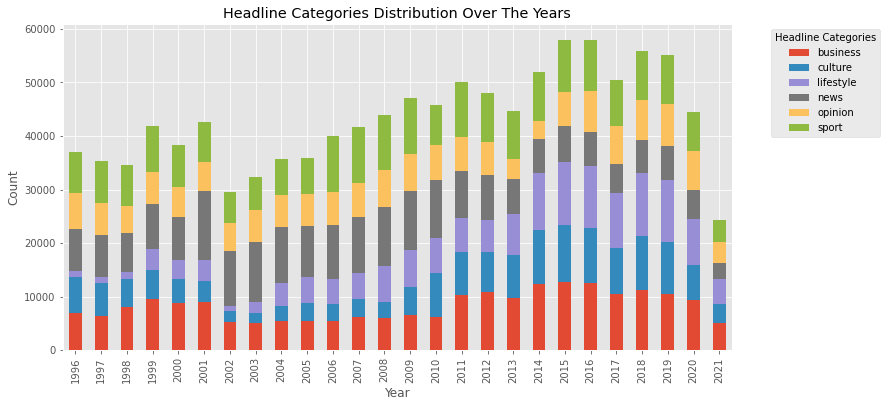

In [24]:

# Group data by year and headline_category, and count the occurrences
grouped_data = data6.groupby(['year', 'primary_category']).size().reset_index(name='count')

# Find the top 3 categories for each year
top_categories_per_year = grouped_data.groupby('year').apply(lambda x: x.nlargest(6, 'count')).reset_index(drop=True)

# Create a pivot table for visualization
pivot_table = top_categories_per_year.pivot_table(index='year', columns='primary_category', values='count', fill_value=0)

# Set the background color of the plot using matplotlib styles
plt.style.use('ggplot')
plt.rcParams['figure.facecolor'] = 'white'

# Plot the stacked bar chart
ax = pivot_table.plot.bar(stacked=True, figsize=(12, 6))
ax.set_xlabel("Year")
ax.set_ylabel("Count")
ax.set_title("Headline Categories Distribution Over The Years")
plt.legend(title='Headline Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.savefig("/content/drive/MyDrive/DeepLearning - Headlines Proj/Plots/Headline Categories Distribution Over The Years.png", bbox_inches='tight')
plt.show()

## Examine the most common words in the headlines and their frequencies.

In [25]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import pickle


# Concatenate all the headline texts into a single string
headline_text = " ".join(data6["headline_text"].tolist())

# Tokenize the string into individual words
words = nltk.word_tokenize(headline_text)

# Filter out stop words
stop_words = set(stopwords.words("english"))
filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.isalpha()]

# Compute the frequency of each word
word_freq = Counter(filtered_words)

#save in a pickle file
with open('word_freq.pkl', 'wb') as file:
    pickle.dump(word_freq, file)

# Sort the words by frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Print the 20 most common words and their frequencies
for word, freq in sorted_words[:20]:
    print(f"{word}: {freq}")

irish: 40141
new: 34711
ireland: 28641
dublin: 21402
us: 20371
says: 16661
man: 13213
may: 12911
review: 12890
back: 12788
time: 12054
home: 11770
world: 11494
first: 10101
get: 10032
eu: 9990
deal: 9698
life: 9681
take: 9366
set: 9149


In [28]:
#we saved the previous cell output in a pickle file to prevent many calculations (attached to this project)

# Open the pickle file in read mode
with open('word_freq.pkl', 'rb') as f:
    # Load the object from the pickle file
    word_freq = pickle.load(f)

## Word Distribution

### We want to understand how many words we need in our model's vocabulary
### therefore we want to find the number of words that covers most of the data

In [29]:
#how many words in total (not unique)

total_words = 0
for word in word_freq:
    total_words += word[1]
print("in total there are:",total_words,"words")

#in freq_dict each word has a tuple value (how many times it appeared, the prop of it)
freq_dict = {}
for item in word_freq:
    freq_dict[item[0]] = (item[1], item[1]/total_words)

#gives you the index of the last word that covers a given precentage of the whole data
def idx_of_precentage (dict,precentage):
    cumsum = 0
    props = [word[1][1] for word in dict]
    idx = 0
    for prop in props:
        if cumsum <= precentage:
            cumsum += prop
            idx +=1
        else:
            break
    return idx

in total there are: 8073062 words


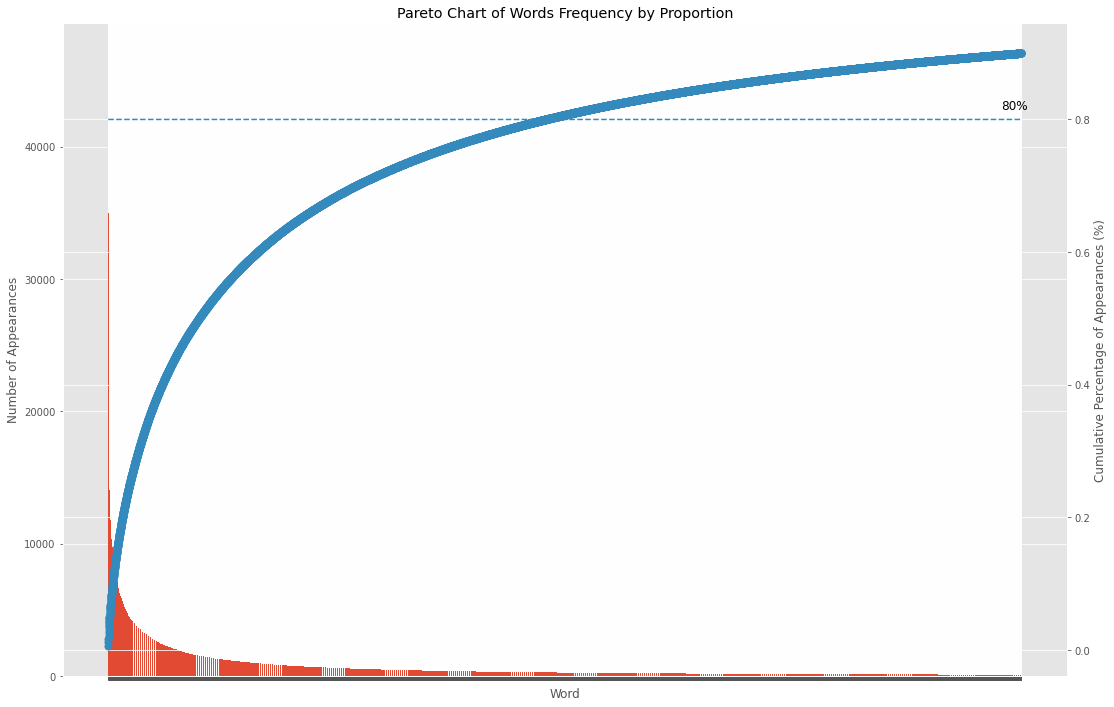

In [30]:
# Define the dictionary object with the word data
word_data = freq_dict.copy()

# Sort the dictionary object by the number of appearances in descending order
sorted_data = sorted(word_data.items(), key=lambda x: x[1][0], reverse=True)

p80_idx = idx_of_precentage(sorted_data, 0.9) 
# Get the top 30 most common words
top_words = sorted_data[:p80_idx]

all_words = sorted_data.copy() #for later use

# Extract the word names and the appearance counts from the data
word_names = [word[0] for word in top_words]
appearances = [word[1][0] for word in top_words]
props = [word[1][1] for word in top_words]

# Create the figure and axes objects
fig, ax = plt.subplots(figsize = (18,12))

# Create the bar plot with the top 30 words and their appearance counts
ax.bar(word_names, appearances)

# Create the cumulative sum of the appearance counts
#cumulative_sum = [sum(appearances[:i+1]) for i in range(len(appearances))]
cumulative_sum_props = [sum(props[:i+1]) for i in range(len(props))]

# Calculate the total number of word appearances
#total_appearances = sum(appearances)
total_props = sum(props)

# Calculate the percentage of each word's appearance count
#percentages = [count / total_appearances * 100 for count in appearances]
percentages1 = [count / total_props * 100 for count in props]

# Create the line plot for the cumulative percentage of word appearances
ax2 = ax.twinx()
ax2.plot(word_names, cumulative_sum_props, color='C1', marker='o', ms=7)
ax2.plot(word_names, [0.8] * len(word_names), color='C1', linestyle='--')
#dotted_line, = ax2.plot(word_names, [total_props * 0.8] * len(word_names), color='C1', linestyle='--')

# Add a label to the dotted line of ax2
label_position = (word_names[-1], 0.8)
ax2.annotate('80%', xy=label_position, xytext=(-20, 10), textcoords='offset points', fontsize=12)

# Set the axis labels and titles
ax.set_xlabel('Word')
ax.set_ylabel('Number of Appearances')
ax2.set_ylabel('Cumulative Percentage of Appearances (%)')
ax.set_title('Pareto Chart of Words Frequency by Proportion')

# Remove the x-axis tick labels
ax.set_xticklabels([])

# Set the tick label font size and rotate the x-axis tick labels
plt.xticks(fontsize=10, rotation=45)


#saving
#plt.savefig("/content/drive/MyDrive/DeepLearning - Headlines Proj/Plots/Pareto Chart of Words Frequency by Proportion.png")

# Show the plot
plt.show()


### understanding how many unique words cover each percent of the data

In [31]:
idx80 = idx_of_precentage(sorted_data,0.8)
top_80p_words = all_words[:idx80+1]
top_80p_words = [word[0] for word in top_80p_words]
top_80p_words

print("There are", len(top_80p_words),"words that make up 80 percent of all words.")

There are 5032 words that make up 80 percent of all words.


In [32]:
idx95 = idx_of_precentage(sorted_data,0.95)
top_95p_words = all_words[:idx95+1]
top_95p_words = [word[0] for word in top_95p_words]

print("There are", len(top_95p_words),"words that make up 95 percent of all words.")

There are 18556 words that make up 95 percent of all words.


In [33]:
idx99 = idx_of_precentage(sorted_data,0.99)
top_99p_words = all_words[:idx99+1]
top_99p_words = [word[0] for word in top_99p_words]

print("There are", len(top_99p_words),"words that make up 99 percent of all words.")

There are 49460 words that make up 99 percent of all words.


In [34]:
#finding how mych data is covered for 20000 words
sum20k = 0
for word in all_words[:20001]:
    sum20k += word[1][1]

print("Vocabulary of 20000 words covers:", round(sum20k,3)*100, "percent of the data")


Vocabulary of 20000 words covers: 95.5 percent of the data


In [35]:
#how many unique words we have in the data
print("In total there are:",len(all_words),"unique words")

In total there are: 107373 unique words


#### finally we saw 20,000 words cover 95.5% od the data, which has 107,373 unique words within (We reduced about 80% of it and we are only missing 4.5% of the words)

## Text Preprocessing

### Tokenizing, Removing punctuation and stop words, Lemmazation

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download the necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess the text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word not in string.punctuation and word not in stopwords.words('english')]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Apply the preprocessing function to the headline_text column
data6['preprocessed_headline_text'] = data6['headline_text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\idan2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\idan2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\idan2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
data6

,headline_category,headline_text,primary_category,day,date,year,preprocessed_headline_text
268753,news.education,knock-on delays for 3rd-level info,news,12,9,2000,knock-on delay 3rd-level info
1487397,news.environment,only 40% of adults believe student climate pro...,news,4,4,2019,40 adult believe student climate protest make ...
1451999,news.ireland,council urged to find engineering solution to ...,news,10,9,2018,council urged find engineering solution danger...
687759,news,commissioner says coverage of garda death 'dis...,news,13,3,2007,commissioner say coverage garda death 'disgusting
305939,news,murder accused 'didn't mean it',news,28,3,2001,murder accused 'did n't mean
...,...,...,...,...,...,...,...
1588370,lifestyle,snow: nine ways to have fun in it; and to keep...,lifestyle,5,2,2021,snow nine way fun keep pet safe
857234,lifestyle,the people's gardens,lifestyle,11,7,2009,people 's garden
519099,lifestyle,a star in the east,lifestyle,24,7,2004,star east
671834,lifestyle,the irish time index,lifestyle,16,12,2006,irish time index


In [38]:
preprocessed_data = data6.copy()
preprocessed_data.to_csv("PreprocessedData.csv",index = False)

In [79]:
import pandas as pd
preprocessed_data = pd.read_csv("data/PreprocessedData2505.csv")

## Exploring sentence length's distribution

Best fitting distribution: gamma
Parameters: (13.88126387915963, -2.8445376378468894, 0.5939914465351226)
Mean: 8.245352011317776
Standard deviation: 2.2130676827412956


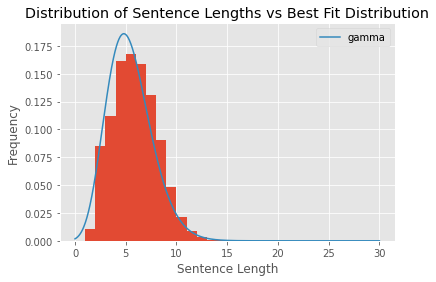

In [40]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

lengths = preprocessed_data.copy()
lengths['sentence_length'] = lengths['preprocessed_headline_text'].apply(lambda x: len(str(x).split()))

# find the maximum length sentence
longest_sentence = lengths.loc[lengths['sentence_length'].idxmax(), 'preprocessed_headline_text']

lengths_dist = lengths["sentence_length"]
lengths_dist = lengths_dist.tolist()

# Define the list of sentence lengths
sentence_lengths =lengths_dist.copy()

# Define the candidate distributions to fit the data
candidate_distributions = [stats.norm, stats.expon, stats.gamma, stats.weibull_min]

# Define a function to fit the data to a given distribution and calculate the sum of squared errors
def fit_data_to_distribution(data, distribution):
    params = distribution.fit(data)
    pdf = distribution.pdf(np.arange(0, max(data) + 1), *params[:-2], loc=params[-2], scale=params[-1])
    sse = np.sum(np.power(pdf - np.histogram(data, bins=np.arange(0, max(data) + 2))[0], 2.0))
    return sse, params

# Fit the data to each distribution and calculate the sum of squared errors
results = []
for dist in candidate_distributions:
    sse, params = fit_data_to_distribution(sentence_lengths, dist)
    results.append((dist.name, sse, params))

# Select the best fitting distribution based on the minimum sum of squared errors
best_fit = min(results, key=lambda x: x[1])

# Print the name and parameters of the best fitting distribution
print('Best fitting distribution:', best_fit[0])
print('Parameters:', best_fit[2])

# Plot a histogram of the sentence lengths
plt.hist(sentence_lengths, bins=range(min(sentence_lengths), max(sentence_lengths) + 2), density=True)

# Plot the best fitting distribution
x = np.linspace(0, max(sentence_lengths) + 1, 1000)
pdf = getattr(stats, best_fit[0]).pdf(x, *best_fit[2][:-2], loc=best_fit[2][-2], scale=best_fit[2][-1])
plt.plot(x, pdf, label=best_fit[0])

# Set the plot title and axis labels
plt.title('Distribution of Sentence Lengths vs Best Fit Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')

# Print the mean and standard deviation of the best fitting distribution
if best_fit[0] == 'norm':
    print('Mean:', best_fit[2][0])
    print('Standard deviation:', best_fit[2][1])
else:
    print('Mean:', best_fit[2][0] * best_fit[2][-1])
    print('Standard deviation:', np.sqrt(best_fit[2][0]) * best_fit[2][-1])

# Display the plot
plt.legend()

#Save
plt.savefig("Distribution of Sentence Lengths vs Best Fit Distribution.png")
plt.show()


## Step 4: Prepare the data for modeling

In [42]:
#filling nulls in 'preprocessed_headline_text'
preprocessed_data['preprocessed_headline_text'] = preprocessed_data['preprocessed_headline_text'].fillna('<missing>').astype(str)

In [43]:
preprocessed_data.shape

(1122600, 7)

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import DistilBertTokenizer, RobertaTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# 1. Split the data into train and test sets (80% training, 20% testing)
train_df, test_df = train_test_split(preprocessed_data, test_size=0.2, random_state=42)

# 2. Encode the 'primary_category' column as integer labels using a label encoder
encoder = LabelEncoder()
train_df['encoded_category'] = encoder.fit_transform(train_df['primary_category'])
test_df['encoded_category'] = encoder.transform(test_df['primary_category'])

sample_fraction = 0.3  # Fraction of data to keep
reduced_df = train_df.groupby('primary_category', group_keys=False).apply(lambda x: x.sample(frac=sample_fraction))

# 3. Tokenize the 'preprocessed_headline_text' column using the DistilBERT and RoBERTa tokenizers
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize using DistilBERT tokenizer
reduced_df['distilbert_input'] = reduced_df['preprocessed_headline_text'].apply(lambda x: distilbert_tokenizer.encode(x, add_special_tokens=True))
test_df['distilbert_input'] = test_df['preprocessed_headline_text'].apply(lambda x: distilbert_tokenizer.encode(x, add_special_tokens=True))

# Tokenize using RoBERTa tokenizer
reduced_df['roberta_input'] = reduced_df['preprocessed_headline_text'].apply(lambda x: roberta_tokenizer.encode(x, add_special_tokens=True))
test_df['roberta_input'] = test_df['preprocessed_headline_text'].apply(lambda x: roberta_tokenizer.encode(x, add_special_tokens=True))

# 4. Pad the tokenized inputs to a fixed length (max_sequence_length), as the headline mean length + 3 std rounded.
max_sequence_length = 15

train_distilbert_padded = pad_sequences(reduced_df['distilbert_input'], maxlen=max_sequence_length, dtype='long', padding='post', truncating='post')
test_distilbert_padded = pad_sequences(test_df['distilbert_input'], maxlen=max_sequence_length, dtype='long', padding='post', truncating='post')

train_roberta_padded = pad_sequences(reduced_df['roberta_input'], maxlen=max_sequence_length, dtype='long', padding='post', truncating='post')
test_roberta_padded = pad_sequences(test_df['roberta_input'], maxlen=max_sequence_length, dtype='long', padding='post', truncating='post')


In [9]:
reduced_df.shape

(364885, 9)